## Capstone Project: Unsupervised Machine Learning

In this Capstone Project, I'm going to work with the UsArrests dataset and do the following things:

1. Generate in-depth PCA report of the data and interpret the outcomes.
2. Explore different clustering techniques and an analysis of the clusters they generate.

Data source: https://www.kaggle.com/datasets/kurohana/usarrets

In [1]:
# Import the libraries we are going to work with
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, silhouette_score

# Visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Data Exploration:

In [2]:
# Load the dataset
arrests_df = pd.read_csv("UsArrests.csv", index_col=0)
arrests_df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
# Let's have a little descriptive look at our data
print(arrests_df.describe().round(2), "\n")

# Get a summary of dataframe
print(arrests_df.info())

       Murder  Assault  UrbanPop   Rape
count   50.00    50.00     50.00  50.00
mean     7.79   170.76     65.54  21.23
std      4.36    83.34     14.47   9.37
min      0.80    45.00     32.00   7.30
25%      4.08   109.00     54.50  15.08
50%      7.25   159.00     66.00  20.10
75%     11.25   249.00     77.75  26.18
max     17.40   337.00     91.00  46.00 

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


The description of the dataset above shows counts, mean, standard deviation, minimum value, maximum value etc., which will be very useful for us moving forward working with PCA and Clustering. If we look closely, our feature variable Assault has significantly higher mean and standard deviation in comparision to other variables. Knowing there's not a balanced distribution of values among variables, we should be scaling the data so the we avoid the chances of different variables impacting the analysis disproportionately.

I'm going to plot separate histogram to have a look around the distrubutio of each feature variable or say the column of our dataset.

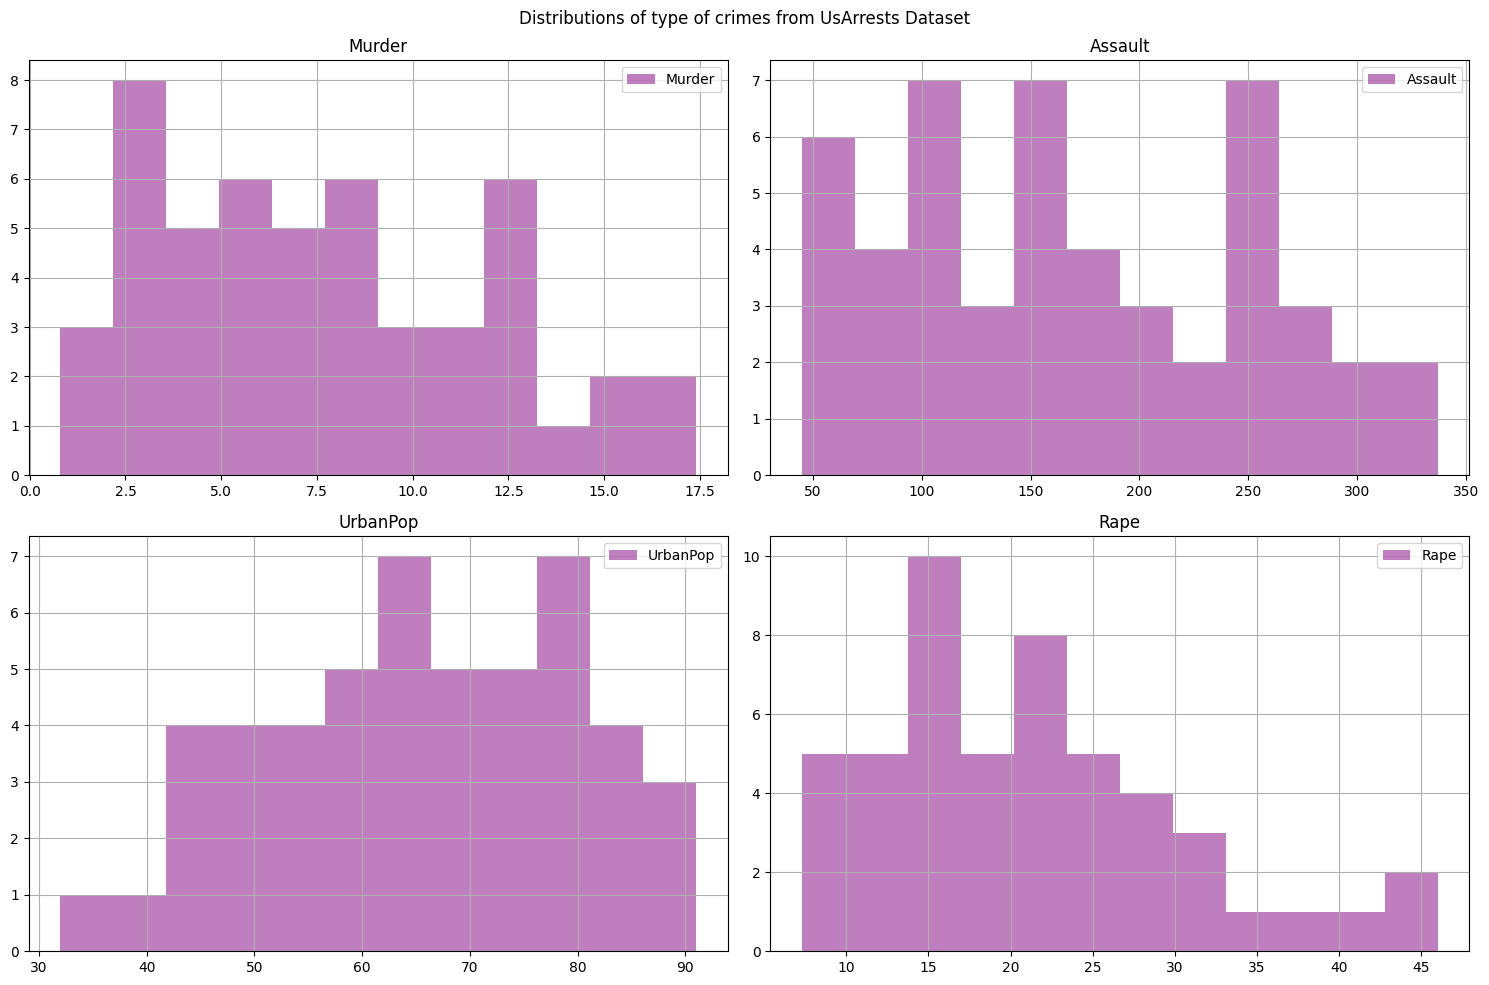

In [4]:
# Create the histograms
arrests_df.hist(color="purple", grid=True, figsize=(15, 10), legend=True, alpha=0.5, bins=12)

# Set the title and show the plot
plt.suptitle("Distributions of type of crimes from UsArrests Dataset")
plt.tight_layout()
plt.show()

The histograms also suggests that there's not a symmetric distribution among feature variables values, hence the plots does not feels so pretty to our eyes. We can observe that Murder, Assault and Rape are slightly skewed to right (Positively skewed) and UrbanPop is slightly skewed to left (Negatively skewed). These histogram gives us the insights how are data spreads and suggests us that scaling the data would be a good point to start with.

Now that we know we have a clean dataset without any missing values, and we had a clear and descriptive look at the structure, distribution and summary of the dataset. Let us move forward working with this dataset.

### Correlation Analysis:

I'll be using a pandas "corr" function to compute correlations between different columns. This will allow us to be familiar with how the feature variables/columns in our dataset correlated to eachother, meaning how the changes in one variable affects another.

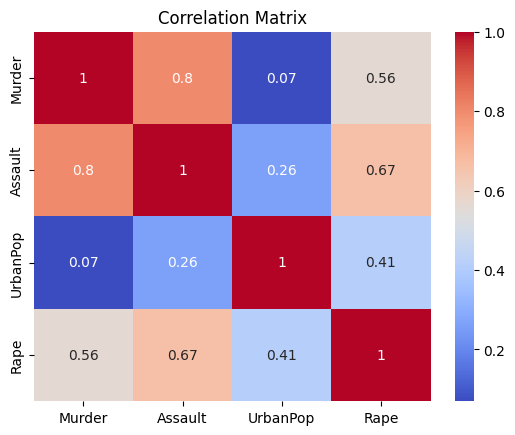

In [5]:
# Create variables "states" containing the list of index values from our dataset
states = arrests_df.index

# Create a variable "labels" containing the list of columns
labels = arrests_df.columns

# Calculate the correlation matrix
corr_df = arrests_df.corr()

# Compute correlation among correlation matrix
correlations = corr_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_df, annot=True, cmap="coolwarm")

# Set the title
plt.title("Correlation Matrix")

# Show the plot
plt.show()

As we can observe in the above heatmap, there's a very strong positive correlation in between Murder, Assault and Rape. UrbanPop also has a slight positive correlation with other variables. Having looked at correlations between all features, we may not need all the features for our models to perform the desired tasks as these features are dependent to eachother. This is where the PCA comes in as a technique to reduce the dimensionality to improve the model's speed and accuracy.

### Standardize the data:

Before we move forward to apply the PCA, I'm going to standardize the feature variables. This will help us prevent some features from dominating the others in our data. By scaling our features to have the same mean and variance, we can ensure that each feature contributes equally to the analysis. This is very important in techniques like PCA.

In [6]:
# Define variable X first
X = arrests_df.iloc[:, 0:4]

# Scale the selected features using StandardScaler
feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(X)
print(X.shape)

(50, 4)


### Principal Components Analysis (PCA):

Principal Components Analysis (PCA) is a method that helps to identify the most important variables which explain the differences between observations. It does this by finding the directions in which our data points are most spread out. If some variables have much higher variance than other variables, they will dominate the analysis. Hence, PCA can help us to balance this out. PCA is useful when we have a lot of variables and need to reduce them to a smaller number of important variables.

Even if we don't have a lot of variables in this dataset, it will still be usefull to use PCA technique to reduce dimentionality/feature variables. PCA will help us have a clean clustering and it's visualization, but most importantly, it will improve our model's speed and accuracy.

In [82]:
# Set the precision of numpy print output to two decimal places
np.set_printoptions(precision=2)

# Perform PCA
pca = PCA()

# Obtain the component
principal_components = pca.fit_transform(X)

# Create a new DataFrame with the principal components and the target variable
pca_df = pd.DataFrame(data=principal_components, index=arrests_df.index, columns=["PC1", "PC2", "PC3", "PC4"])

pca_df.head()

,PC1,PC2,PC3,PC4
City,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [8]:
# Compute and Print the explained variance ratio our principal components generated by PCA
print(f"Explained variance ratio: {pca.explained_variance_ratio_}", "\n")

# Compute and Print the cumulative sum of explained variance of principal components
print(f"Cumulative sum of explained variance ratio: {np.cumsum(pca.explained_variance_)}", "\n")

# Compute and print the absolute values of the principal component
print(abs(pca.components_))

Explained variance ratio: [0.62 0.25 0.09 0.04] 

Cumulative sum of explained variance ratio: [2.53 3.54 3.9  4.08] 

[[0.54 0.58 0.28 0.54]
 [0.42 0.19 0.87 0.17]
 [0.34 0.27 0.38 0.82]
 [0.65 0.74 0.13 0.09]]


These ratios above tell us how much information each principal component holds and can help us decide how many principal components to keep for our analysis. Based on the information we have, the first two principal components components alone explains 87% of the varaince, and these first two components together explains 3.54 units of variance which means most of the features are dependent to first two components. 

In [9]:
# Define a function to create a biplot
def biplot(score, coeff, labels=None, points=None):
    # Get the x and y values
    xs = score[:, 0]
    ys = score[:, 1]
    
    # Get the number of rows in the coefficient matrix
    n = coeff.shape[0]
    
    # Calculate the scaling factors for the x and y axes
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    # Create a new figure and axes
    fig, ax = plt.subplots()    
    
    # Plot the x and y values, scaled by their respective scaling factors
    ax.scatter(xs * scalex, ys * scaley, s=5, alpha=0.5)

    # Add annotations for each point labeled by its corresponding index in the original dataset
    for i in range(0, len(xs)):
        txt = states[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    # Add arrows to the plot for each variable in the coefficient matrix
    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'r', alpha = 0.5)
        
        # Add labels to the arrows based on the variable names in the dataset
        if labels is None:
            ax.text(coeff[i, 0]* 1.15, coeff[i, 1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i, 0]* 1.15, coeff[i, 1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    # Set the labels
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
    # Add a grid
    plt.grid()
    
    # Refrence: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

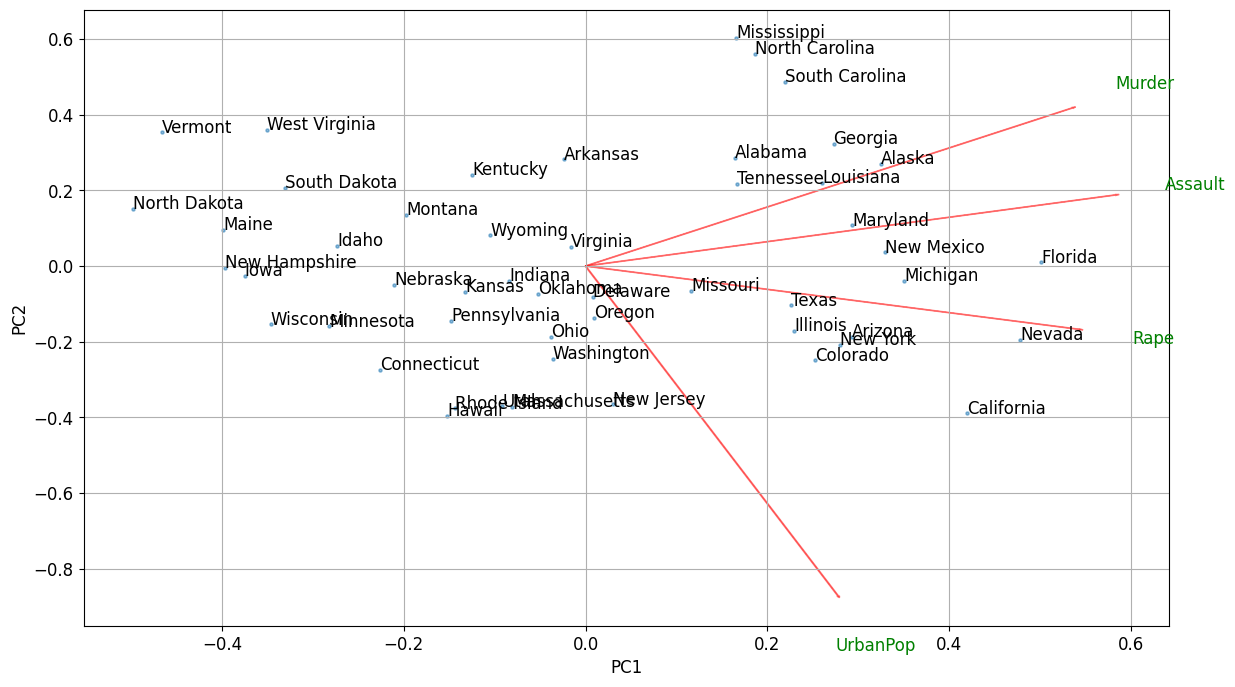

In [10]:
# Adjust the size of the plot and font size
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["font.size"] = 12

# Call our biplot function to create a biplot
biplot(principal_components[:,0:2], np.transpose(pca.components_[0:2, :]), list(labels), list(states))
plt.show()

The biplot above shows the relationship between the states and the four original feature variables of the dataset, namely: Murder, Assault, UrbanPop, and Rape. It consists of two parts, the first part is a scatter plot of the observations i.e. states projected onto the first two principal components. The second part is a plot of the loadings of the first two principal components.

The plot of loadings shows the contribution of our original variables to the first two principal components. It seems there's a very high positive correlation between each of the original variable and two of the principal components. From this visualization, we can mainly observe that Murder and Assault variables have the strongest influence on the two of principal components.

In [11]:
# Let's have a quick look at feature importance
pc1 = abs(pca.components_[0] )
pc2 = abs(pca.components_[1] )
feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.535899,0.418181
1,Assault,0.583184,0.187986
2,UrbanPop,0.278191,0.872806
3,Rape,0.543432,0.167319


It appears that Assault and Murder are the two most important features as they have the highest absolute values of importance in both PC1 and PC2. This what our visualization above suggets as well.

### Graphical Representation of the Feature Importance:

Let's have a look at the Scree plot and Cumulative Explained Variance plot, below.

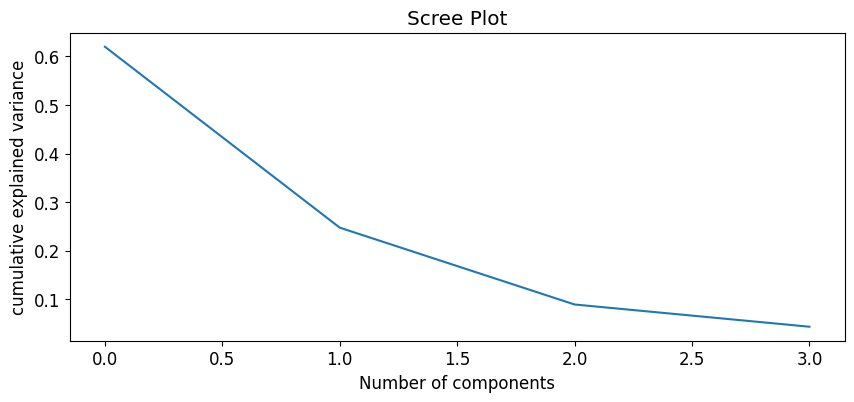

In [12]:
# Create a scree plot 
plt.figure(figsize=(10, 4))
plt.plot(pca.explained_variance_ratio_)

# Define labels and set the title
plt.xlabel("Number of components")
plt.ylabel("cumulative explained variance")
plt.title("Scree Plot")
plt.show()

Text(0.5, 1.0, 'Cumulative Explained Variance')

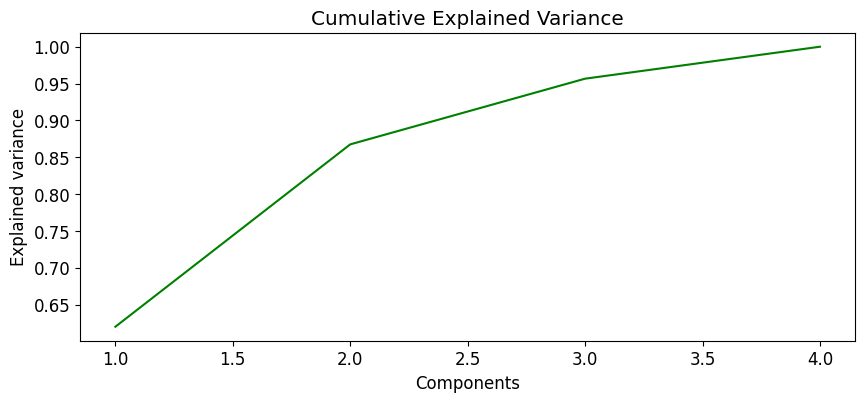

In [13]:
# Create a plot for cumulative sum of variance
plt.figure(figsize=(10, 4))
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c="green")
# Define labels and set the title
plt.ylabel("Explained variance")
plt.xlabel("Components")
plt.title("Cumulative Explained Variance")

After performing PCA on the dataset with 4 variables, we found that the first 2 principal components can explain approximately 87% of the total variance. This allows us to reduce the dimensionality of the dataset and use these 2 components for cluster analysis, instead of the original 4 variables. This can help simplify the analysis and reduce the computational complexity which will improve our model's accuracy and speed.

In [115]:
# Create a new Pandas Dataframe with first two principal components
X_pc = pd.DataFrame(data= principal_components[:, 0:2], index= arrests_df.index, columns= ["PC1", "PC2"])
X_pc.head()

,PC1,PC2
City,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


### Agglomerative Hierarchical Clustering:

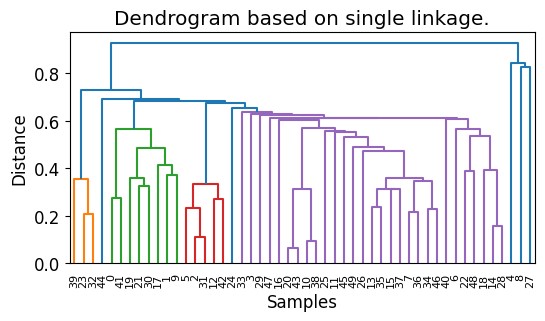

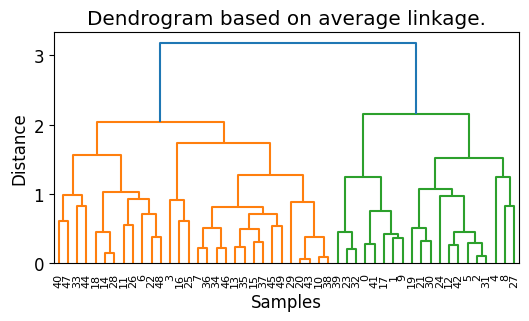

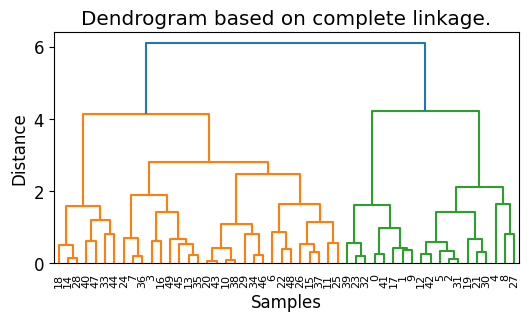

In [89]:
# Define variable of lists containing linkage methods
linkage_methods = ["single", "average", "complete"]

# Use for loop to loop over the linkage methods we have
for linkage_method in linkage_methods:
    # Compute linkage matrix and plot a dendogram
    plt.figure(figsize=(6, 3))
    dendrogram(linkage(X_pc.values, method=linkage_method))
    plt.title(f"Dendrogram based on {linkage_method} linkage.")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

From all the dendrograms above, the average linkage method creates the most balanced dispersion of clusters and will therefore be the method of choice for the rest of this analysis.

Let's get a clearer dendrogram for an average linkage method.

<class 'tuple'>


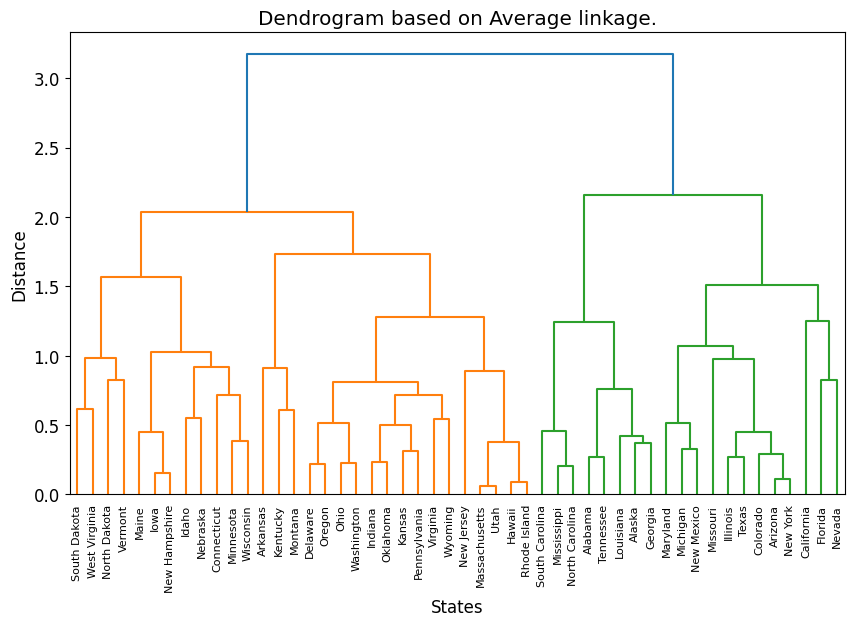

In [90]:
# Create a dendogram using "Average" linkage method
plt.figure(figsize=(10, 6))
dendrogram(linkage(X_pc.values, method="average"), labels=pca_df1.index)

# Define x label and the title
plt.title(f"Dendrogram based on Average linkage.")
plt.xlabel("States")
plt.ylabel("Distance")
plt.show()

The dendrogram above is based on average linkage, where x axis represents states and y axis represents distance or dissimilarity. The height of the vertical lines represents the distance between clusters, the higher the line, the more dissimilar the clusters are. Here, with k=2, the clusters are of size 30 and 20.

So our dendrogram shows there are two group of states which are more similar to each other in comparision to the other one. The vertical lines connects the clusters which represents the dissimilarity between these two groups. We can observe that the states like South Dakota, West Virginia, Ohio etc. that have similar values for the first two components are clustered together, and those such as Mississippi, Alabama, Alaska etc. that are dissimilar are  separated into different cluster. We can have a clearer idea of this using a scatter plot of thsese clusters, but we will not dive any deeper this time considering the limited time bound.

In [105]:
# Choose a fixed number of clusters
n_clusters = 2

# Create a gglomerative clustering model and fit our data
ac_model = AgglomerativeClustering(n_clusters=n_clusters, linkage="average")
ac_model.fit(X_pc.values)

# Predict the clusters and name this variable y_pred
y_pred = ac_model.labels_

In [108]:
# Calculate the Silhouette score
avg_silhouette = silhouette_score(X_pc.values, y_pred)

# Print the number of states in each clusters
print("Number of states in each cluster:", (np.bincount(y_pred)), "\n")

# Display the answer
print(f"The Silhouette score for our model is {avg_silhouette}.")

Number of states in each cluster: [20 30] 

The Silhouette score for our model is 0.4758031477075562.


The Silhouette Score for our model is 0.476, which suggests that while the clusters are somewhat distinct, there is still significant overlap and ambiguity in the clustering. The score ranges from -1 to 1, with -1 indicating a very poor separation of clusters and 1 indicating perfect separation. Therefore, although our score is not the best, it is still reasonable. However, there is room for improvement to achieve better-separated clusters.

### K-Means Clustering:

Based on the various results of our analysis above, it appears that the clusters have a regular shape, as evidenced by the PCA biplot. We will be setting K i.e. the number of clusters to 2. The clusters are shown in a visualization below.

In [114]:
# Extract the first two components and define variables principal_components
X = X_pc.values[:, 0]
y = X_pc.values[:, 1]

In [116]:
# Set the number of clusters to 2
k = 2

# Initialize a KMeans clustering model with the appropriate parameters
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=7)

# Fit the KMeans model to our data and predict the cluster labels for each data point
cluster_labels = kmeans.fit_predict(X_pc)

# Obtain the coordinates of the centroid for each cluster
cent = kmeans.cluster_centers_

C:\Users\ajayg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


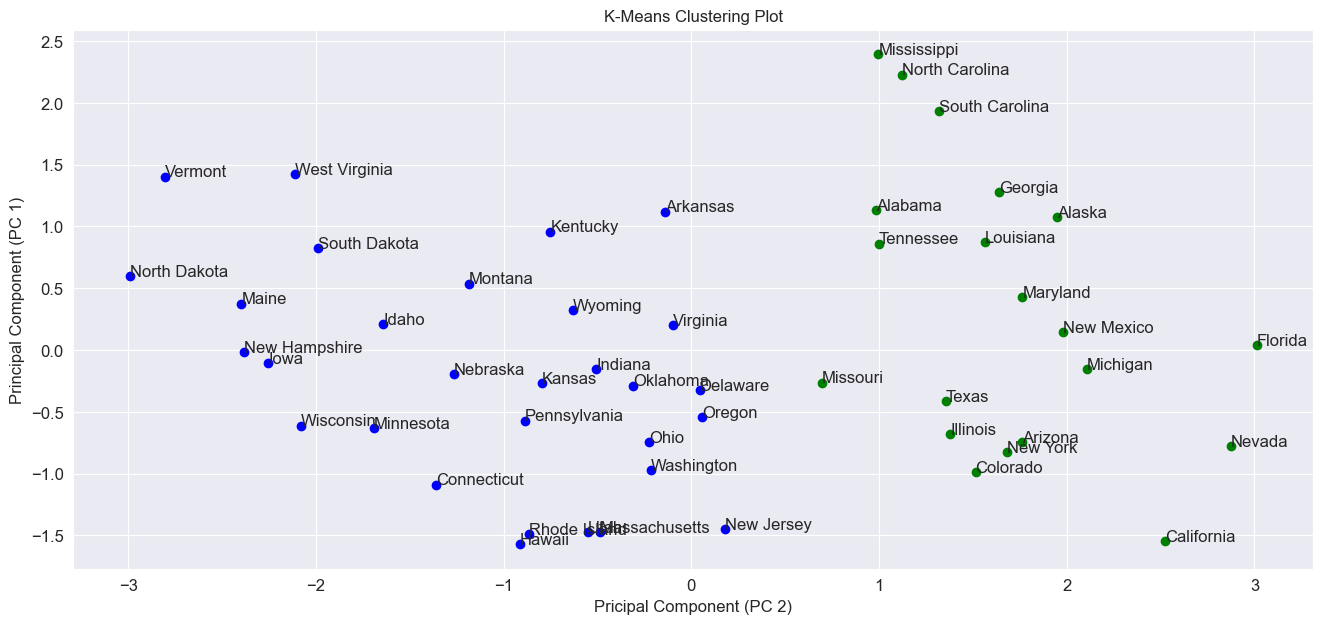

In [124]:
# Create a scatter plot, set the size and colors
fig, ax = plt.subplots(figsize=(16,7))
sns.set_style("darkgrid")
colours = "bg"

# Looping through the number of clusters, and annotating each data point with the state abbreviation
for i in range(0, k):
    ax.scatter(X[cluster_labels == i], y[cluster_labels == i], c = colours[i]) 

for i in range(0, len(X)):
        txt = states[i]
        ax.annotate(txt, (X[i], y[i]))

# Set the title and labels
ax.set_title("K-Means Clustering Plot", fontsize=(12))
ax.set_xlabel("Pricipal Component (PC 2)")
ax.set_ylabel("Principal Component (PC 1)")
plt.show()

In [128]:
# Get the states in each cluster
clusters = pd.DataFrame()
group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group0 = np.array(arrests_df.index)[group0_indices]
group1 = np.array(arrests_df.index)[group1_indices]

print(f"Group 0: {group0}\n\n")
print(f"Group 1: {group1}")

Group 0: ['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Idaho' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Maine' 'Massachusetts' 'Minnesota' 'Montana'
 'Nebraska' 'New Hampshire' 'New Jersey' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Group 1: ['Alabama' 'Alaska' 'Arizona' 'California' 'Colorado' 'Florida' 'Georgia'
 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Missouri'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Texas']


From the above K-Means Clustering, we can find out the two different clusters based on the type of crimes and arrest data as we defined the number of clusters equaled to 2 beforehand. We achieved the same results from hierarchical clustering as well. These findings can provide insights into potential underlying factors that contribute to crime rates in different states of the US. We could go even further with these analyses to identify factors that are more common in states with high crime rates and those information could potentially help us to develop targeted strategies to address these factors and ultimately reduce crime rates. But for now, due to the limited time I have, I will not dive any further this dataset.